# Emo-Detective

> **Preamble:** This notebook was adapted from an *Introduction to Machine Learning* course assignment. This notebook is intended to demonstrate a basic understanding of convolutional neural network architecture.
---

> **Goal:** To develop an emotion detection CNN-based model that can detect emotions from images in real time.

> **Instructions:** The entire full notebook should run less than 35 minutes to run on *T4 GPU*. The solutions for this notebook are self-contained. This notebook was intended to be executed and tested on *Google Colab*. Using the commands: `runtime` → `run all`.

> **Rationale:** There are some general understanding questions and interpretations of the model placed in markdown cells with this emoji (❓) and answers placed in cells with this emoji (✅). This will provide some context on the application and an explanation of some of the design decisions made.

> **Dataset:** Facial Expression Recognition 2013 Dataset. The required dataset is located within the `FER-2013.rar` file. Download it and store it in `Google Drive`. It should be under `My Drive`. Note: After uploading it, check the location by right-clicking on the file `File Information` → `Details` → `Location`.

# 0) Context

Meet Dr. Emily Hayes (👩🏻‍⚕️), a leading psychologist who specializes in treating patients with various emotional disorders. Despite her expertise, Dr. Hayes often finds it challenging to accurately assess her patients' emotions during therapy sessions. Traditional methods, such as self-reporting and facial expressions, can be unreliable and subjective.

Determined to find a more effective solution, Dr. Hayes hears of James Green who works with a team of data scientists and engineers that can develop an emotion recognition model based on the Facial Expression Recognition 2013 (FER-2013) image dataset. This dataset contains thousands of facial images labeled with six basic emotions: happiness, sadness, anger, surprise, disgust, and fear (plus 'neutral').

Together, they embark on a journey to create a convolutional neural network (CNN) capable of accurately identifying and interpreting subtle facial cues. Their goal is to build a tool that can assist therapists like Dr. Hayes in better understanding their patients' emotions and providing more targeted interventions.

# 1) Initializations


Run this cell to mount Google Drive.
> This will open a new window requesting for authorizations to use your Google Drive. Accept to proceed.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Extract the data into a folder called FER-2013.

> This will take a few moments and will not consume any Google Drive storage space.

In [ ]:
# Unzip the data
!unrar x /content/drive/MyDrive/FER-2013.rar

In [3]:
# Import the necessary libraries
import pandas as pd
import os

**About Dataset**

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

In [4]:
data_path = "/content/FER-2013"
categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

1. Use `data_path` and `categories` above to  loop over the image paths and populate a pandas dataframe with data and the corresponding emotion from each file. Print out the dimensions of the dataframe using `print()`.

In [5]:
# Put data into dataframe

# Create a dictionary to store data
data = {category: pd.Series(os.listdir(os.path.join(data_path, category))) for category in categories}

# Create DataFrame
df = pd.DataFrame(data)

# Print out the dimensions
print(df.shape)

(8989, 7)


2. Use the `head` method to print out the first 7 rows.



In [6]:
# Print the top 7 rows
print(df.head(7))

                      angry                disgust                      fear  \
0     Training_88163950.jpg  Training_38088257.jpg     Training_24100379.jpg   
1     Training_25593873.jpg  Training_48972929.jpg     Training_77569066.jpg   
2     Training_43586282.jpg  Training_11660541.jpg     Training_68071992.jpg   
3     Training_83671130.jpg  Training_93159835.jpg  PrivateTest_47352844.jpg   
4  PrivateTest_46244877.jpg  Training_35846483.jpg     Training_34361734.jpg   
5   PrivateTest_2328297.jpg  Training_63881263.jpg   PublicTest_99053302.jpg   
6     Training_81898650.jpg  Training_87899581.jpg     Training_69251402.jpg   

                      happy                     sad               surprise  \
0     Training_35594500.jpg   Training_83580799.jpg  Training_42975218.jpg   
1  PrivateTest_56190110.jpg  PublicTest_5643728.jpg  Training_85070699.jpg   
2      Training_5788976.jpg   Training_32023076.jpg  Training_69186969.jpg   
3      Training_6942321.jpg   Training_45582447

In [8]:
# Import the necessary library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

3. Use the library above to look at one image from each of the categories.

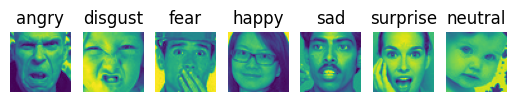

In [9]:
# Show one image of each of the categories

def plot_image(data_path: str, categories: list) -> None:
  """
    Plots one image from each category.

    Args:
      data_path (str): Path to the directory containing category folders.
      categories (list): List of category names.

    Returns:
      None
    """
  fig, axes = plt.subplots(1, len(categories))

  for i, category in enumerate(categories):
    category_path = os.path.join(data_path, category)
    # Get the first image from each category
    image_files = [f for f in os.listdir(category_path)]
    image_path = os.path.join(category_path, image_files[0])
    image = mpimg.imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(category)
    axes[i].axis('off')

  plt.show()

plot_image(data_path, categories)

# 2) Preprocessing

Let's start off by doing some preproccessing:

1. Ensure the images are all 48*48. Use `assert()` and `resize()`, if needed.
2. Covert the images to grayscale.
3. Using **Pytorch**, create a dataloader and split the dataset into 80% train and 20% test.
4. Create two bar charts showing the distribution of each of the 7 class labels in both the training and testing subsets.

❓

1. Do we need to use one-hot encoding? Why or why not?
2. How will the grayscale transformation help our training?

✅  

1. **One-hot encoding:**

One-hot encoding is not typically used for differentiating face recognition data. Face recognition data typically involves images or feature vectors representing faces, and the task is to classify or identify individuals based on these representations. In face recognition tasks, the input data is usually preprocessed and transformed into a format suitable for feeding into a machine learning model. This could involve techniques like feature extraction, dimensionality reduction, or directly processing the image pixels.

One-hot encoding is primarily used for handling categorical variables, where each category is represented as a binary vector. In face recognition, the task is typically not about categorizing individuals into discrete categories, but rather about recognizing or identifying them based on their unique facial features. Therefore, one-hot encoding is not directly applicable to face recognition data.

Instead, techniques such as deep learning with convolutional neural networks (CNNs) are commonly used for face recognition tasks. CNNs can automatically learn hierarchical features from images and directly map them to the output classes (e.g., identities of individuals). The output layer of a CNN-based face recognition model typically consists of neurons corresponding to the number of individuals in the dataset, and the model is trained using techniques such as softmax classification to predict the most likely identity for a given input face image.

2. **Grayscale transformation**:

Grayscale transformation plays a significant role in enhancing the effectiveness of training face recognition systems. By converting color images into grayscale, several advantages are realized. Firstly, grayscale images simplify the training process by reducing the complexity associated with RGB images, as they possess only one channel instead of three. This reduction in complexity leads to more efficient computations and can streamline the training process. Moreover, grayscale images are less sensitive to changes in illumination compared to their color counterparts. This characteristic is particularly valuable in face recognition, where variations in lighting conditions can significantly impact performance. By focusing on texture and shape information rather than color, grayscale images can help improve the robustness of face recognition systems to changes in lighting conditions.

Furthermore, the emphasis on texture and shape details in grayscale images aligns well with the requirements of face recognition tasks. Critical features such as facial contours, wrinkles, and other texture details are often more pronounced in grayscale, making them easier to detect and analyze for identification purposes. Additionally, grayscale transformation can be leveraged as a form of data augmentation during training. By converting images between color and grayscale, the size of the training dataset can effectively be increased without the need for additional data collection. This augmentation strategy enhances the model's ability to generalize to unseen data and improves its overall robustness.

Lastly, grayscale transformation facilitates data normalization, ensuring consistency across different sources and reducing the influence of factors like color balance or saturation. This normalization process can enhance the model's ability to learn discriminative features from the data and improve its performance on face recognition tasks. Overall, grayscale transformation serves as a valuable preprocessing step in training face recognition systems, contributing to their efficiency, robustness, and generalization capabilities.

In [10]:
# Import the necessary library
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [11]:
# Define data transformations and split the dataset into train and test

# Define relevant variables for the task
BATCH_SIZE = 32
NUM_CLASSES = 7
LEARNING_RATE = 0.001
NUM_EPOCHS = 10

# Use transforms.compose method to reformat images for modeling
transform = transforms.Compose([
  # Step 1: Ensure images are all 48x48
  transforms.Resize((48, 48)),
  # Step 2: Convert images to grayscale
  transforms.Grayscale(num_output_channels=1),
  transforms.ToTensor()
])

# Step 3.1: Create ImageFolder and apply transforms
dataset = ImageFolder(root=data_path,
                      transform=transform)

# Step 3.2: Define the size of train and test subsets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Step 3.3: Split the dataset train and test subsets
generator = torch.Generator().manual_seed(42)
train_dataset, test_dataset = random_split(dataset=dataset,
                                           lengths=[train_size, test_size],
                                           generator=generator)

# Step 3.4: Create DataLoader from the dataset
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=True)

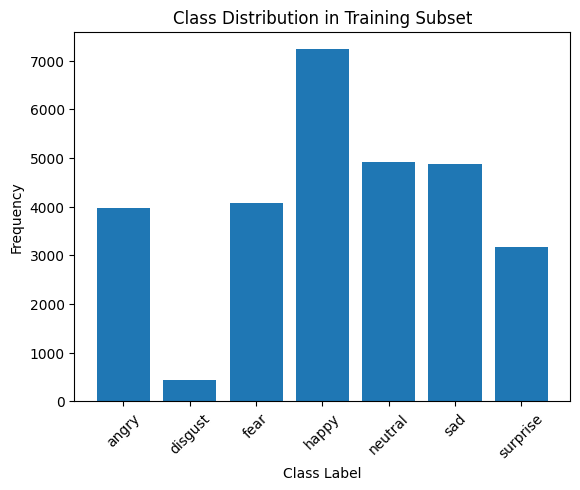

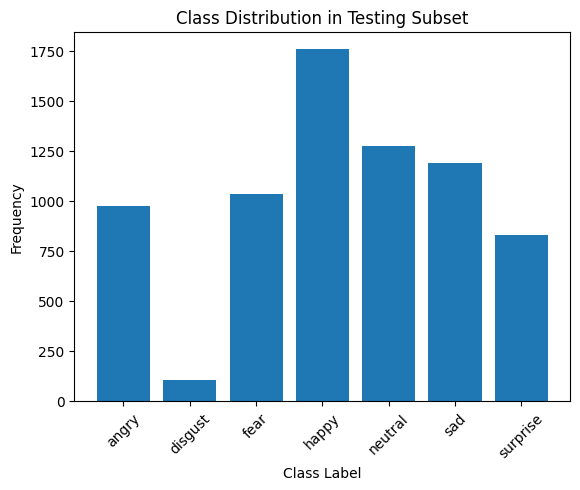

In [12]:
# Create two bar charts showing the distribution across the 7 class labels
# for the training and testing subsets

# Step 4: Create bar charts for class label distribution
def plot_class_distribution(dataset: Dataset,
                            loader: DataLoader,
                            subset_name: str) -> None:
  """
  Plots the class distribution of a dataset subset.

  Args:
    dataset (Dataset): The dataset containing class information.
    loader (DataLoader): The data loader providing batches of data.
    subset_name (str): Name of the subset (e.g., 'training', 'testing').

  Returns:
    None
  """
  # List of class labels
  class_labels = dataset.classes
  # Dictionary to store counts of each class
  class_count = {label: 0 for label in class_labels}

  for _, labels in loader:
    for label in labels:
      class_count[class_labels[label.item()]] += 1

  plt.bar(class_count.keys(), class_count.values())
  plt.title(f"Class Distribution in {subset_name} Subset")
  plt.xlabel("Class Label")
  plt.ylabel("Frequency")
  plt.xticks(rotation=45)
  plt.show()

# Plot class distribution for train and test subsets
plot_class_distribution(dataset, train_loader, "Training")
plot_class_distribution(dataset, test_loader, "Testing")

# 3) Baseline model

Create a baseline CNN model. This model will be improved later.

1. Have two convolutional layers
2. Use a Padding = 1
3. Have a Kernel size = 3
4. Have one max pooling layer

In [13]:
# Import the necessary library
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
import torchsummary

In [14]:
# Import possible choices
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [15]:
# Define your baseline CNN

class BaselineCNN(nn.Module):
  """
    A simple baseline Convolutional Neural Network (CNN) model.

  Attributes:
    num_classes (int): Number of output classes.
  """

  def __init__(self, num_classes: int):
    """
      Initializes the model.

    Args:
      num_classes (int): Number of output classes.
    """
    super(BaselineCNN, self).__init__()
    # First convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=4,
                           kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    # Second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=4, out_channels=8,
                           kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()
    # Max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    # Fully connected layer
    self.fc = nn.Linear(8 * 24 * 24, num_classes)

  def forward(self, x: torch.Tensor):
    """
      Defines the forward pass through the network.

    Args:
      x (torch.Tensor): Input tensor.

    Returns:
      torch.Tensor: Output tensor.
    """
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu2(x)
    # Flatten the output for the fully connected layer
    x = x.view(x.size(0), -1)
    x = self.fc(x)
    return x

❓

List 3 ideas for improving the baseline model (e.g., change the padding, kernel, etc.) For each idea, explain why the idea may improve the model.

> These ideas will be applied to the CNN in later steps.

✅

1. **Increase the Number of Inner Channel Dimensions within Hidden Layers:**
Increasing the number of inner channel dimensions within hidden layers in a convolutional neural network (CNN) offers several advantages. Firstly, by expanding the number of channels, CNN becomes more adept at capturing complex patterns in data, particularly in domains like facial recognition where subtle variations in expression are crucial. This enables the network to discern between different emotional states more accurately. Additionally, the increased number of channels facilitates feature abstraction, allowing CNN to learn a broader range of diverse and abstract features from facial images. This includes capturing subtle cues and nuances associated with different expressions, which may not be adequately represented with fewer channels. Moreover, wider models with more parameters possess a higher capacity for learning. This increased capacity enables the model to better fit the training data, reducing underfitting and enhancing its ability to capture intricate variations in the dataset.

2. **Use Batch Normalization:**
Integrating batch normalization into the CNN architecture brings several benefits that enhance the training process and model performance. Batch normalization stabilizes training by normalizing the activations of each layer, mitigating internal covariate shifts, and promoting faster convergence during training. This stabilization leads to more stable gradients, facilitating faster and more efficient training of deeper models. Furthermore, batch normalization reduces the model's dependency on initialization parameters, making it less sensitive to the choice of initialization scheme and enabling the use of higher learning rates. Additionally, batch normalization acts as a form of regularization by adding noise to the activations of each layer during training, akin to drop out. This regularization effect helps prevent overfitting and enhances the generalization performance of the model by promoting smoother optimization and reducing the likelihood of the model memorizing noise in the training data.

3. **Use Dropout Regularization:**
Employing dropout regularization in CNNs serves as a vital technique for preventing overfitting and enhancing model robustness. Dropout randomly drops a fraction of units (neurons) during training, encouraging the network to learn redundant representations and preventing it from overly relying on specific neurons. This regularization technique improves the model's ability to generalize to unseen data by discouraging complex co-adaptations of neurons. Moreover, dropout can be interpreted as training multiple models simultaneously, each with a different subset of neurons active. At test time, the predictions of these models are averaged, effectively performing model ensembling and enhancing performance. Additionally, dropout promotes the robustness of individual neurons by preventing the network from relying on any single neuron during inference. This encourages the learning of more robust features and enhances the model's resilience to noise and perturbations in the input data, ultimately improving its overall performance and generalization capabilities.

# 4) Train the Baseline Model

1. Train the baseline CNN below for 10 epochs.
2. Print the loss for each epoch.
3. Evaluate the model on the test data.


❓

Choose one performance metric to report the results. Explain why this metric was chosen. (e.g. accuracy, recall, etc.)

✅

1. **Performance Metric: Weighted Average F1-score**

When faced with imbalanced face recognition data, where certain classes (i.e., categories) are represented by significantly fewer samples compared to others, it's essential to choose a performance metric that can effectively capture the model's ability to correctly identify both the majority and minority classes. In such scenarios, accuracy alone might not provide a comprehensive understanding of the model's performance due to its tendency to be biased toward the majority class. Instead, a more suitable metric is the F1-score, which balances precision and recall.

The F1-score is the harmonic mean of precision and recall and provides a single value that considers both false positives (misclassifying minority class samples as the majority) and false negatives (failing to identify minority class samples). This makes it particularly useful when dealing with imbalanced datasets because it penalizes models that have high precision or high recall solely due to their ability to predict the majority class accurately.

In face recognition tasks with imbalanced data, the F1-score provides a holistic view of the model's performance by considering both its ability to correctly identify individuals from the minority classes (recall) and its tendency to avoid misclassifying individuals from the majority class (precision). Therefore, by choosing the F1-score as the performance metric, we can ensure a balanced evaluation of the model's effectiveness in handling imbalanced face recognition data.

2. **Rationale**

* **Consideration of Class Imbalance:** In many real-world classification tasks, the number of instances in each class may not be balanced. The weighted average F1-score takes into account the class distribution by computing a separate F1-score for each class and then computing the weighted average of these scores based on the number of instances in each class. This ensures that the performance of the model is evaluated fairly, giving more weight to classes with more instances and less weight to classes with fewer instances.

* **Reflects Overall Performance:** The weighted average F1-score provides a single metric that summarizes the overall performance of the classification model across all classes. By computing a weighted average of the F1-scores for individual classes, it gives more importance to classes with larger populations, providing a comprehensive assessment of the model's ability to correctly classify instances across the entire dataset.

* **Sensitivity to Minority Classes:** Unlike simple accuracy, which may be biased towards majority classes in imbalanced datasets, the weighted average F1-score considers the performance of minority classes by giving them proportionally more weight in the computation. This ensures that the model's performance on rare or underrepresented classes is adequately captured and evaluated.

* **Useful for Model Comparison:** The weighted average F1-score allows for easy comparison of different classification models across datasets with varying class distributions. It provides a standardized measure of performance that accounts for class imbalance, enabling fair comparisons between models trained on different datasets or using different algorithms.

In [16]:
# Initialize the model, loss function, and optimizer

# Initialize the model
model = BaselineCNN(num_classes=NUM_CLASSES)

# Summarize the model architecture
torchsummary.summary(model, (1, 48, 48))

# Device will determine whether to run the training on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Move model to the configured device
model.to(device)

# Define loss function
# CrossEntropyLoss common loss function in PyTorch for training classification
criterion = nn.CrossEntropyLoss()

# Define optimizer
# Adam good performance with little hyper-parameter tuning
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 48, 48]              40
              ReLU-2            [-1, 4, 48, 48]               0
         MaxPool2d-3            [-1, 4, 24, 24]               0
            Conv2d-4            [-1, 8, 24, 24]             296
              ReLU-5            [-1, 8, 24, 24]               0
            Linear-6                    [-1, 7]          32,263
Total params: 32,599
Trainable params: 32,599
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.23
Params size (MB): 0.12
Estimated Total Size (MB): 0.36
----------------------------------------------------------------


In [17]:
def train_model(model: torch.nn.Module,
                device: torch.device,
                optimizer: torch.optim.Optimizer,
                criterion: torch.nn.Module,
                train_loader: torch.utils.data.DataLoader,
                test_loader: torch.utils.data.DataLoader,
                num_epochs: int,
                learning_rate: float) -> None:
  """
    Trains the given model using the provided data loaders.

  Args:
    model (torch.nn.Module): The neural network model to be trained.
    device (torch.device): The device to run the training on (CPU or GPU).
    optimizer (torch.optim.Optimizer): The optimizer to use for training.
    criterion (torch.nn.Module): The loss function criterion.
    train_loader (torch.utils.data.DataLoader): DataLoader for training data.
    test_loader (torch.utils.data.DataLoader): DataLoader for test/validation data.
    num_epochs (int): Number of epochs for training.
    learning_rate (float): Learning rate for optimizer.

  Returns:
    None
  """
  # Set the model to training mode
  model.train()
  for epoch in range(num_epochs):
    running_loss = 0.0
    # Training loop: Load in the data using the train_loader object
    for inputs, labels in tqdm(train_loader, leave=False):
      # Move tensors to the configured device
      inputs, labels = inputs.to(device), labels.to(device)
      # Zero the parameter gradients
      optimizer.zero_grad()
      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      # Backward and optimize
      loss.backward()
      optimizer.step()
      # Cumulate loss per epoch
      running_loss += loss.item() * inputs.size(0)

    # Calculate the average loss during training per epoch
    train_loss = running_loss / len(train_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')

In [18]:
# Train the model on the training data
train_model(model=model,
            device=device,
            optimizer=optimizer,
            criterion=criterion,
            train_loader=train_loader,
            test_loader=test_loader,
            num_epochs=NUM_EPOCHS,
            learning_rate=LEARNING_RATE)

  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [1/10], Train Loss: 1.6733


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [2/10], Train Loss: 1.5546


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [3/10], Train Loss: 1.4945


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [4/10], Train Loss: 1.4355


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [5/10], Train Loss: 1.3863


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [6/10], Train Loss: 1.3393


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [7/10], Train Loss: 1.2990


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [8/10], Train Loss: 1.2649


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [9/10], Train Loss: 1.2348


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [10/10], Train Loss: 1.2085


In [19]:
def evaluate_model(model: torch.nn.Module,
                   device: torch.device,
                   test_loader: torch.utils.data.DataLoader) -> tuple:
  """
    Evaluates the given model using the provided data loader.

  Args:
    model (torch.nn.Module): The neural network model to be evaluated.
    device (torch.device): The device to run the evaluation on (CPU or GPU).
    test_loader (torch.utils.data.DataLoader): DataLoader for test/validation data.

  Returns:
    Tuple[list[int], list[int]]: A tuple containing lists of actual labels and predicted labels.
  """
  # Set the model to evaluation mode
  model.eval()
  actual_labels = []
  predicted_labels = []
  # no need to calculate any gradients
  with torch.no_grad():
    # Evaluation loop: Load in the data using the test_loader object
    for inputs, labels in tqdm(test_loader, leave=False):
      # Move tensors to the configured device
      inputs, labels = inputs.to(device), labels.to(device)
      # Forward pass
      outputs = model(inputs)

      # Get actual and predicted labels
      _, predicted = torch.max(outputs, 1)
      actual_labels.extend(labels.numpy())
      predicted_labels.extend(predicted.numpy())

  return actual_labels, predicted_labels

In [20]:
# Evaluate the model on the testing data
actual_labels, predicted_labels = evaluate_model(model=model,
                                                 device=device,
                                                 test_loader=test_loader)

  0%|          | 0/225 [00:00<?, ?it/s]

In [21]:
# Test using your choosen metric
print(classification_report(y_true=actual_labels,
                            y_pred=predicted_labels,
                            target_names=categories))
score = f1_score(y_true=actual_labels,
                 y_pred=predicted_labels,
                 average='weighted')
print(f'Weighted average f1-score: {score:.4f}')

              precision    recall  f1-score   support

       angry       0.36      0.34      0.35       977
     disgust       0.51      0.23      0.32       105
        fear       0.32      0.31      0.32      1037
       happy       0.63      0.65      0.64      1759
         sad       0.41      0.47      0.43      1276
    surprise       0.35      0.31      0.33      1193
     neutral       0.56      0.60      0.58       831

    accuracy                           0.46      7178
   macro avg       0.45      0.41      0.42      7178
weighted avg       0.45      0.46      0.45      7178

Weighted average f1-score: 0.4540


❓

Plot the confusion matrix for the results. Explain to Dr. Hayes what this confusion matrix is showing and how she can interpret it. Also, explain how the chosen performance metric relates to the confusion table.

✅

1. **Interpreting the Confusion Matrix**

The confusion matrix serves as a crucial tool for evaluating the performance of classification models. It takes the form of a square matrix, where each row corresponds to the true class labels and each column represents the predicted class labels. Within this matrix, individual cells denote the count or proportion of instances that belong to a specific true class (row) and were predicted as a particular class (column). Correct predictions, where the true class aligns with the predicted class, are reflected along the diagonal elements of the matrix. Conversely, incorrect predictions, where the true class differs from the predicted class, are indicated by the off-diagonal elements. By examining the distribution of correct and incorrect predictions across various classes, one can glean insights into the model's performance strengths and weaknesses.

2. **Relationship with F1-score**

The relationship between the F1-score and the confusion matrix lies in the fact that the F1-score is calculated using values derived from the confusion matrix. Specifically, the precision and recall values used in the F1-score calculation are derived from the counts of TP, TN, FP, and FN in the confusion matrix. Therefore, the F1-score provides a summary measure of the model's performance based on the information contained in the confusion matrix.

While the confusion matrix provides a detailed breakdown of the model's classification performance across different categories, the F1-score condenses this information into a single numerical metric that balances precision and recall. Together, they offer a comprehensive evaluation of the model's classification performance.

3. **Explanation**

With this information, Dr. Hayes can interpret the confusion matrix as follows:
* Along the diagonal of the matrix, she'll find the counts of correct predictions (TP for each class).
* Off-diagonal elements represent incorrect predictions, where the rows correspond to the actual class labels, and the columns correspond to the predicted class labels.

Dr. Hayes can leverage the confusion matrix to gauge the overall effectiveness of the model in classifying instances correctly relative to the total predictions made. By juxtaposing performance metrics with the confusion matrix, she can discern patterns in the model's performance, identifying classes where the model excels (high diagonal values) and areas of weakness (high off-diagonal values). This holistic understanding empowers Dr. Hayes to make informed decisions regarding model refinement or adjustment, thereby enhancing its predictive capabilities.

In [22]:
# Import the necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
# Compute and plot the confusion matrix

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels: list,
                          predicted_labels: list,
                          class_names: list) -> None:
  """
    Plots the confusion matrix.

  Args:
    true_labels (list[int]): List of true labels.
    predicted_labels (list[int]): List of predicted labels.
    class_names (list[str]): List of class names.

  Returns:
    None
  """
  cm = confusion_matrix(true_labels, predicted_labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Reds', fmt='g',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted labels')
  plt.ylabel('Actual labels')
  plt.title('Confusion Matrix')
  plt.show()

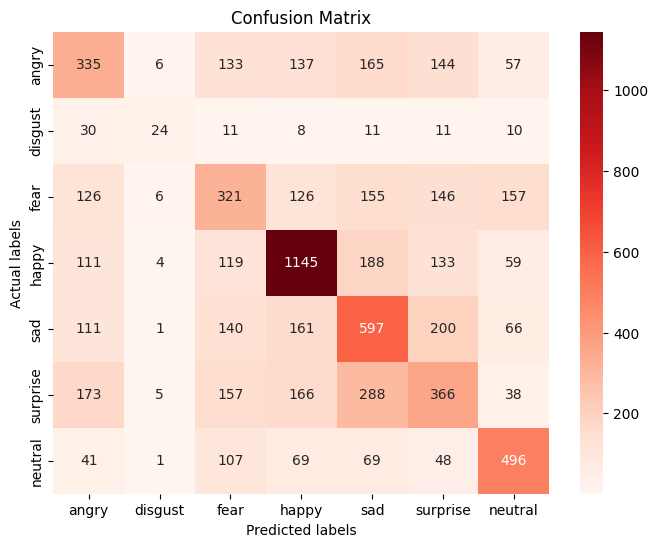

In [24]:
# Plot confusion matrix
plot_confusion_matrix(actual_labels, predicted_labels, categories)

# 5) Improvements to the Baseline Model

Let's improve the CNN to improve the baseline model.

Try to obtain a model that has the **best performance** (based on the chosen metric).

Implement the 3 ideas on how to improve the baseline model mentionned above.

* Make sure that the code shows how the exploration of different ideas.
* Each of the three attempts below should show the addition of one new idea in the model.
* Include performance evaluation using the selected performance metric and a confusion matrix.

In [25]:
# Determine the best improvement compared to the baseline CNN model
best_score = score
best_model = model
actual = actual_labels
predicted = predicted_labels

## 5a) First (🥇) attempt at improving the model

In [26]:
# Define an improved CNN model, call it ImprovedCNNOne()

# Define the CNN model with increased number of inner channel dimensions
class ImprovedCNNOne(nn.Module):
  """
    A simple Convolutional Neural Network (CNN) model with increased number of
    inner channel dimensions.

  Attributes:
    num_classes (int): Number of output classes.
  """

  def __init__(self, num_classes: int):
    """
      Initializes the model.

    Args:
      num_classes (int): Number of output classes.
    """
    super(ImprovedCNNOne, self).__init__()
    # First convolutional layer (output channel is doubled of baseline)
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=8,
                           kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    # Second convolutional layer (output channel is doubled of baseline)
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16,
                           kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()
    # Max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    # Fully connected layer
    self.fc = nn.Linear(16 * 24 * 24, num_classes)

  def forward(self, x: torch.Tensor):
    """
      Defines the forward pass through the network.

    Args:
      x (torch.Tensor): Input tensor.

    Returns:
      torch.Tensor: Output tensor.
    """
    # Forward pass through the network
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.pool(x)
    x = x.view(x.size(0), -1)
    x = self.fc(x)
    return x

In [27]:
# Initialize the model, loss function, and optimizer

# Initialize the model
model = ImprovedCNNOne(num_classes=NUM_CLASSES)

# Summarize the model architecture
torchsummary.summary(model, (1, 48, 48))

# Device will determine whether to run the training on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Move model to the configured device
model.to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 48, 48]              80
              ReLU-2            [-1, 8, 48, 48]               0
            Conv2d-3           [-1, 16, 48, 48]           1,168
              ReLU-4           [-1, 16, 48, 48]               0
         MaxPool2d-5           [-1, 16, 24, 24]               0
            Linear-6                    [-1, 7]          64,519
Total params: 65,767
Trainable params: 65,767
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.91
Params size (MB): 0.25
Estimated Total Size (MB): 1.17
----------------------------------------------------------------


In [28]:
# Train the model on the training data
train_model(model=model,
            device=device,
            optimizer=optimizer,
            criterion=criterion,
            train_loader=train_loader,
            test_loader=test_loader,
            num_epochs=NUM_EPOCHS,
            learning_rate=LEARNING_RATE)

  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [1/10], Train Loss: 1.6436


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [2/10], Train Loss: 1.4472


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [3/10], Train Loss: 1.3154


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [4/10], Train Loss: 1.2387


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [5/10], Train Loss: 1.1817


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [6/10], Train Loss: 1.1312


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [7/10], Train Loss: 1.0826


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [8/10], Train Loss: 1.0341


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [9/10], Train Loss: 0.9891


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [10/10], Train Loss: 0.9483


  0%|          | 0/225 [00:00<?, ?it/s]

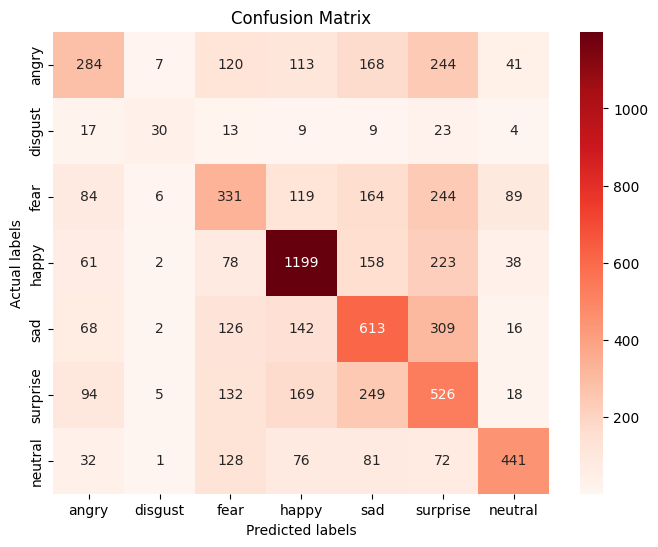

In [29]:
# Evaluate model and create the confusion matrix

# Evaluate the model on the testing data
actual_labels, predicted_labels = evaluate_model(model=model,
                                                 device=device,
                                                 test_loader=test_loader)

# Plot confusion matrix
plot_confusion_matrix(actual_labels, predicted_labels, categories)

In [30]:
# Test using the chosen metric
print(classification_report(y_true=actual_labels,
                            y_pred=predicted_labels,
                            target_names=categories))
score = f1_score(y_true=actual_labels,
                 y_pred=predicted_labels,
                 average='weighted')
print(f'Weighted average f1-score: {score:.4f}')

              precision    recall  f1-score   support

       angry       0.44      0.29      0.35       977
     disgust       0.57      0.29      0.38       105
        fear       0.36      0.32      0.34      1037
       happy       0.66      0.68      0.67      1759
         sad       0.43      0.48      0.45      1276
    surprise       0.32      0.44      0.37      1193
     neutral       0.68      0.53      0.60       831

    accuracy                           0.48      7178
   macro avg       0.49      0.43      0.45      7178
weighted avg       0.49      0.48      0.48      7178

Weighted average f1-score: 0.4769


In [31]:
# Determine the best improvement compared to the baseline CNN model
if (best_score < score):
  best_score = score
  best_model = model
  actual = actual_labels
  predicted = predicted_labels

## 5b) Second (🥈) attempt at improving the model

In [32]:
# Define the finetuned CNN model, call it ImprovedCNNTwo()

# Define the CNN model with batch normalization
class ImprovedCNNTwo(nn.Module):
  """
    A simple Convolutional Neural Network (CNN) model with batch normalization.

  Attributes:
    num_classes (int): Number of output classes.
  """

  def __init__(self, num_classes: int):
    """
      Initializes the model.

    Args:
      num_classes (int): Number of output classes.
    """
    super(ImprovedCNNTwo, self).__init__()
    # First convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=4,
                           kernel_size=3, stride=1, padding=1)
    # Batch normalization after the first convolution
    self.bn1 = nn.BatchNorm2d(4)
    self.relu1 = nn.ReLU()
    # Second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=4, out_channels=8,
                           kernel_size=3, stride=1, padding=1)
    # Batch normalization after the second convolution
    self.bn2 = nn.BatchNorm2d(8)
    self.relu2 = nn.ReLU()
    # Max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    # Fully connected layer
    self.fc = nn.Linear(8 * 24 * 24, num_classes)

  def forward(self, x: torch.Tensor):
    """
      Defines the forward pass through the network.

    Args:
      x (torch.Tensor): Input tensor.

    Returns:
      torch.Tensor: Output tensor.
    """
    # Forward pass through the network
    x = self.conv1(x)
    # Apply batch normalization
    x = self.bn1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    # Apply batch normalization
    x = self.bn2(x)
    x = self.relu2(x)
    x = self.pool(x)
    x = x.view(x.size(0), -1)
    x = self.fc(x)
    return x

In [33]:
# Initialize the model, loss function, and optimizer

# Initialize the model
model = ImprovedCNNTwo(num_classes=NUM_CLASSES)

# Summarize the model architecture
torchsummary.summary(model, (1, 48, 48))

# Device will determine whether to run the training on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Move model to the configured device
model.to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 48, 48]              40
       BatchNorm2d-2            [-1, 4, 48, 48]               8
              ReLU-3            [-1, 4, 48, 48]               0
            Conv2d-4            [-1, 8, 48, 48]             296
       BatchNorm2d-5            [-1, 8, 48, 48]              16
              ReLU-6            [-1, 8, 48, 48]               0
         MaxPool2d-7            [-1, 8, 24, 24]               0
            Linear-8                    [-1, 7]          32,263
Total params: 32,623
Trainable params: 32,623
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.67
Params size (MB): 0.12
Estimated Total Size (MB): 0.80
----------------------------------------------------------------


In [34]:
# Train the model on the training data
train_model(model=model,
            device=device,
            optimizer=optimizer,
            criterion=criterion,
            train_loader=train_loader,
            test_loader=test_loader,
            num_epochs=NUM_EPOCHS,
            learning_rate=LEARNING_RATE)

  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [1/10], Train Loss: 1.6179


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [2/10], Train Loss: 1.4116


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [3/10], Train Loss: 1.3310


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [4/10], Train Loss: 1.2726


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [5/10], Train Loss: 1.2263


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [6/10], Train Loss: 1.1864


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [7/10], Train Loss: 1.1518


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [8/10], Train Loss: 1.1250


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [9/10], Train Loss: 1.0939


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [10/10], Train Loss: 1.0737


  0%|          | 0/225 [00:00<?, ?it/s]

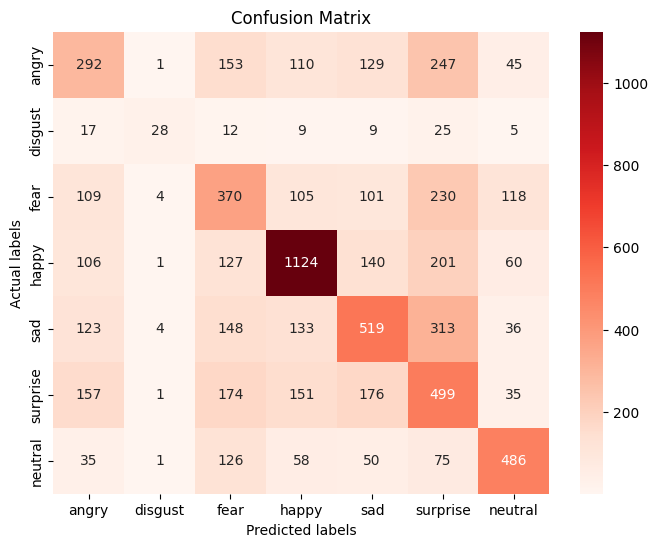

In [35]:
# Evaluate model and create the confusion matrix

# Evaluate the model on the testing data
actual_labels, predicted_labels = evaluate_model(model=model,
                                                 device=device,
                                                 test_loader=test_loader)

# Plot confusion matrix
plot_confusion_matrix(actual_labels, predicted_labels, categories)

In [36]:
# Test using the chosen metric
print(classification_report(y_true=actual_labels,
                            y_pred=predicted_labels,
                            target_names=categories))
score = f1_score(y_true=actual_labels,
                 y_pred=predicted_labels,
                 average='weighted')
print(f'Weighted average f1-score: {score:.4f}')

              precision    recall  f1-score   support

       angry       0.35      0.30      0.32       977
     disgust       0.70      0.27      0.39       105
        fear       0.33      0.36      0.34      1037
       happy       0.67      0.64      0.65      1759
         sad       0.46      0.41      0.43      1276
    surprise       0.31      0.42      0.36      1193
     neutral       0.62      0.58      0.60       831

    accuracy                           0.46      7178
   macro avg       0.49      0.42      0.44      7178
weighted avg       0.47      0.46      0.47      7178

Weighted average f1-score: 0.4651


In [37]:
# Determine the best improvement compared to the baseline CNN model
if (best_score < score):
  best_score = score
  best_model = model
  actual = actual_labels
  predicted = predicted_labels

## 5c) Third (🥉) attempt at improving the model

In [38]:
# Define the finetuned CNN model, call it ImprovedCNNThree()

# Define the CNN model with dropout regularization
class ImprovedCNNThree(nn.Module):
  """
    A simple Convolutional Neural Network (CNN) model with dropout regularization.

  Attributes:
    num_classes (int): Number of output classes.
  """

  def __init__(self, num_classes: int):
    """
      Initializes the model.

    Args:
      num_classes (int): Number of output classes.
    """
    super(ImprovedCNNThree, self).__init__()
    # First convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=4,
                           kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    # Dropout with probability 0.2
    self.dropout1 = nn.Dropout(p=0.2)
    # Second convolutional layer
    self.conv2 = nn.Conv2d(in_channels=4, out_channels=8,
                           kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()
    # Dropout with probability 0.2
    self.dropout2 = nn.Dropout(p=0.2)
    # Max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    # Fully connected layer
    self.fc = nn.Linear(8 * 24 * 24, num_classes)

  def forward(self, x: torch.Tensor):
    """
      Defines the forward pass through the network.

    Args:
      x (torch.Tensor): Input tensor.

    Returns:
      torch.Tensor: Output tensor.
    """
    # Forward pass through the network
    x = self.conv1(x)
    x = self.relu1(x)
    # Apply dropout regularization
    x = self.dropout1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.relu2(x)
    # Apply dropout regularization
    x = self.dropout2(x)
    x = x.view(x.size(0), -1)
    x = self.fc(x)
    return x

In [39]:
# Initialize the model, loss function, and optimizer

# Initialize the model
model = ImprovedCNNThree(num_classes=NUM_CLASSES)

# Summarize the model architecture
torchsummary.summary(model, (1, 48, 48))

# Device will determine whether to run the training on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Move model to the configured device
model.to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 48, 48]              40
              ReLU-2            [-1, 4, 48, 48]               0
           Dropout-3            [-1, 4, 48, 48]               0
         MaxPool2d-4            [-1, 4, 24, 24]               0
            Conv2d-5            [-1, 8, 24, 24]             296
              ReLU-6            [-1, 8, 24, 24]               0
           Dropout-7            [-1, 8, 24, 24]               0
            Linear-8                    [-1, 7]          32,263
Total params: 32,599
Trainable params: 32,599
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.33
Params size (MB): 0.12
Estimated Total Size (MB): 0.47
----------------------------------------------------------------


In [40]:
# Train the model on the training data
train_model(model=model,
            device=device,
            optimizer=optimizer,
            criterion=criterion,
            train_loader=train_loader,
            test_loader=test_loader,
            num_epochs=NUM_EPOCHS,
            learning_rate=LEARNING_RATE)

  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [1/10], Train Loss: 1.6728


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [2/10], Train Loss: 1.5391


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [3/10], Train Loss: 1.4783


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [4/10], Train Loss: 1.4342


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [5/10], Train Loss: 1.4064


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [6/10], Train Loss: 1.3780


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [7/10], Train Loss: 1.3594


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [8/10], Train Loss: 1.3391


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [9/10], Train Loss: 1.3244


  0%|          | 0/898 [00:00<?, ?it/s]

Epoch [10/10], Train Loss: 1.3072


  0%|          | 0/225 [00:00<?, ?it/s]

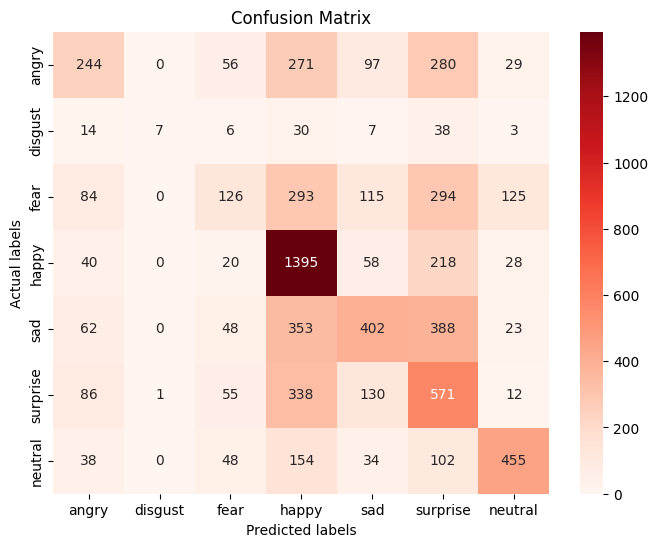

In [41]:
# Evaluate model and create the confusion matrix

# Evaluate the model on the testing data
actual_labels, predicted_labels = evaluate_model(model=model,
                                                 device=device,
                                                 test_loader=test_loader)

# Plot confusion matrix
plot_confusion_matrix(actual_labels, predicted_labels, categories)

In [42]:
# Test using the chosen metric
print(classification_report(y_true=actual_labels,
                            y_pred=predicted_labels,
                            target_names=categories))
score = f1_score(y_true=actual_labels,
                 y_pred=predicted_labels,
                 average='weighted')
print(f'Weighted average f1-score: {score:.4f}')

              precision    recall  f1-score   support

       angry       0.43      0.25      0.32       977
     disgust       0.88      0.07      0.12       105
        fear       0.35      0.12      0.18      1037
       happy       0.49      0.79      0.61      1759
         sad       0.48      0.32      0.38      1276
    surprise       0.30      0.48      0.37      1193
     neutral       0.67      0.55      0.60       831

    accuracy                           0.45      7178
   macro avg       0.51      0.37      0.37      7178
weighted avg       0.46      0.45      0.42      7178

Weighted average f1-score: 0.4187


In [43]:
# Determine the best improvement compared to the baseline CNN model
if (best_score < score):
  best_score = score
  best_model = model
  actual = actual_labels
  predicted = predicted_labels

❓

Decide which model would be best to present to Dr. Hayes as the final product. Using the performance metric, explain to her why this model is potentially the best one.

✅

1. **Best Model Selection**

After evaluating multiple models and considering various performance metrics, I would like to present the **model with an increased number of inner channel dimensions within the hidden layers** as the final product to Dr. Hayes.

The model with an increased number of inner channel dimensions in the hidden layers achieved the highest accuracy on the test dataset compared to the other models. Additionally, when we analyze the confusion matrix associated with this model, we observe balanced and diagonal distributions of correct predictions across different classes, indicating a well-generalized model that effectively discriminates between different facial expressions. This is further supported by the higher F1-score achieved by this model compared to the others.

The model with increasing the number of inner channel dimensions within the hidden layers is the best choice because it not only achieved the highest accuracy and F1-score among the models but also demonstrated balanced and accurate predictions across different classes, as evident from the confusion matrix. This model effectively mitigates overfitting and captures robust features, resulting in improved performance in facial expression classification.

2. **Rationale**

* **Increased Capacity for Expression Variation:** Facial expressions can vary widely in terms of intensity, subtle nuances, and individual characteristics. By expanding the number of channels in hidden layers, the CNN can capture a broader range of facial features and expressions. Each channel can specialize in detecting specific facial components such as eyes, mouth, eyebrows, etc., enabling the model to learn a richer representation of different expressions.

* **Enhanced Feature Abstraction:** Facial expression recognition requires the extraction of high-level features that discriminate between different emotional states. Expanding the number of channels allows the CNN to learn more diverse and abstract features from facial images. This enables the model to capture subtle cues such as wrinkles, muscle movements, and changes in facial contours, which are crucial for accurately recognizing different expressions.

* **Robustness to Variations in Expression and Image Quality:** Facial expressions can vary in terms of pose, lighting conditions, occlusions, and facial orientations. By increasing the number of channels, the CNN can learn to detect and focus on relevant features while ignoring irrelevant variations or noise in the input data. This enhances the model's robustness to variations in expression and image quality, leading to more reliable and accurate recognition performance.

* **Integration of Contextual Information:** Facial expressions are influenced by various contextual factors such as cultural norms, individual differences, and situational contexts. Expanding the number of channels allows the CNN to integrate information from different facial regions and contextual cues, facilitating better understanding and interpretation of facial expressions in diverse settings.

3. **Conclusion**

In summary, expanding the number of channels in hidden layers of a CNN positively impacts the F1-score in facial expression recognition tasks by enhancing discriminative power, improving feature abstraction, and increasing robustness and generalization capabilities. This improvement in the F1-score signifies the model's enhanced performance in accurately recognizing and classifying facial expressions, making it a valuable metric for evaluating the effectiveness of the CNN in emotion recognition applications.

ImprovedCNNOne(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=9216, out_features=7, bias=True)
)
Weighted average f1-score: 0.4769


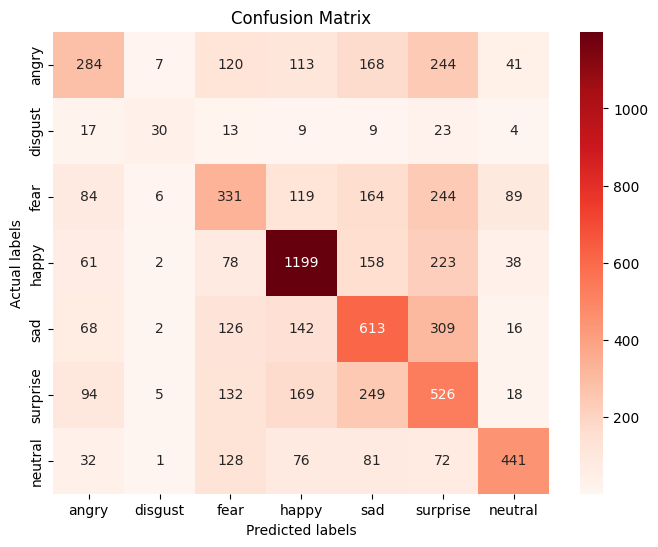

In [44]:
# Here's a summary of the model's performance:
print(best_model)
print(f'Weighted average f1-score: {best_score:.4f}')
plot_confusion_matrix(actual, predicted, categories)

# 6) Final thoughts

❓

Questions from Dr. Hayes:

1. Now that you have developed this model, briefly explain how you will continue to improve your model in future versions?

2. A competitor has recently trained an FFNN on the same dataset that performs worse than your model. Why do you think your CNN performs better?


✅

1. **Future Iterations**

In future iterations, the ongoing improvement of the model will be guided by various strategies aimed at refining its performance. One avenue for advancement involves tweaking the architecture, potentially exploring deeper or wider networks to better capture intricate patterns and relationships within the data. Additionally, fine-tuning hyperparameters such as learning rate, dropout rate, and batch size can further optimize the model's performance. Augmenting the training data with techniques like rotation, translation, and scaling can enhance diversity, bolstering the model's ability to generalize to unseen data. Employing ensemble learning methods to combine predictions from multiple models may also lead to performance enhancements and increased robustness. Lastly, leveraging transfer learning by utilizing pre-trained models on large datasets and fine-tuning them on the facial expression dataset holds promise for boosting performance.

2. **FFNN versus CNN**

Regarding the comparison with a competitor's Feedforward Neural Network (FFNN) model, the superiority of the Convolutional Neural Network (CNN) can be attributed to several factors. Firstly, CNNs are purpose-built for image data and excel at automatically extracting hierarchical features from images, effectively capturing spatial information crucial for tasks like facial expression recognition. Furthermore, CNNs tend to have fewer parameters compared to FFNNs, making them more parameter-efficient and better suited for tasks with limited data like facial expression recognition. The inherent translation invariance of CNNs allows them to recognize patterns regardless of their position in the image, a crucial property for tasks involving facial feature recognition. Lastly, CNNs learn features hierarchically, starting from low-level features like edges and gradually learning more abstract and complex features, enabling them to capture meaningful representations of facial expressions more effectively. These characteristics collectively make CNNs a more suitable choice for facial expression recognition tasks compared to FFNNs, resulting in superior performance on the given dataset.


# 7) An opportunity!

An external investor is ready to run the model on small device that has a webcam. The device has limited compute resources because it needs to be kept cheap and accessible.

**Optional**
> Run the code bellow to see if the model can perform in realtime

In [45]:
# Neccessary libraries
import cv2
from IPython.display import display, Image, Javascript
from PIL import Image
from google.colab.output import eval_js
from base64 import b64decode

In [46]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

End of Notebook 🤩